# Simple Linear Regression

I will use Used Car Price Data from www.kaggle.com/ankits29/used-car-price-data to do simple linear regression.

In [32]:
#import required libraries

import pandas as pd
import numpy as np

In [2]:
#read the data .csv file

df = pd.read_csv('car_data.csv')

In [3]:
#see the data head

pd.set_option('display.max_columns', None)
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [4]:
#see how many rows there are

df.shape

(2237, 9)

In [5]:
#drop duplicates

df.drop_duplicates(inplace=True)

In [6]:
#see how many rows there are after duplicates dropped

df.shape

(2237, 9)

In [7]:
#see correlation between variables

df.corr()

,Selling Price,Kilometers Driven,Year,Car Condition
Selling Price,1.000000,-0.163254,0.568156,0.435813
Kilometers Driven,-0.163254,1.000000,-0.427502,-0.450421
Year,0.568156,-0.427502,1.000000,0.649011
Car Condition,0.435813,-0.450421,0.649011,1.000000


For this polynomial regression. let's use indpendent variable with highest correlation 'Year'.

# The best order with highest R-square?

In [9]:
y_data = df['Selling Price']
x_data = df.drop('Selling Price',axis=1)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

print("Test sample rows :", x_test.shape[0])
print("Training sample rows:",x_train.shape[0])

Test sample rows : 560
Training sample rows: 1677


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'R-square Using Test Data')

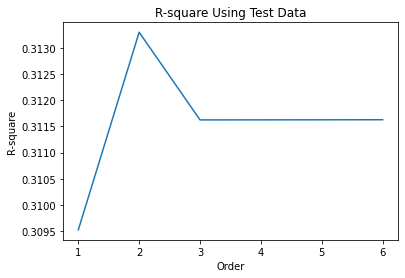

In [22]:
#using loop to figure best order for pol

lr = LinearRegression()
Rsqu_test = []

order = [1, 2, 3, 4, 5, 6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Year']])
    
    x_test_pr = pr.fit_transform(x_test[['Year']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R-square')
plt.title('R-square Using Test Data')

We can see that second order have the best R-square, so second order polynomial will be used

In [29]:
#make the regression object

pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['Year']])
x_test_pr = pr.fit_transform(x_test[['Year']])

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [34]:
#define function to make polynomial regression plot with separated data (train data and test data)

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylabel('Price')
    plt.legend()

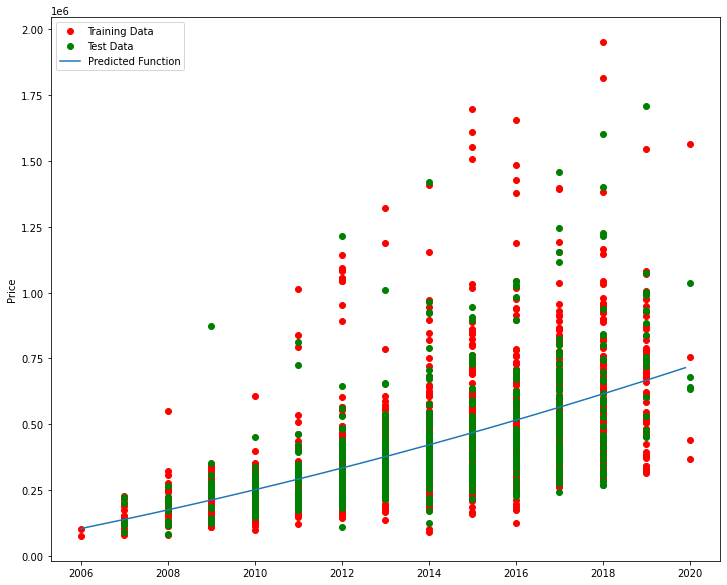

In [35]:
PollyPlot(x_train[['Year']], x_test[['Year']], y_train, y_test, poly,pr)

Let's see the residual plot

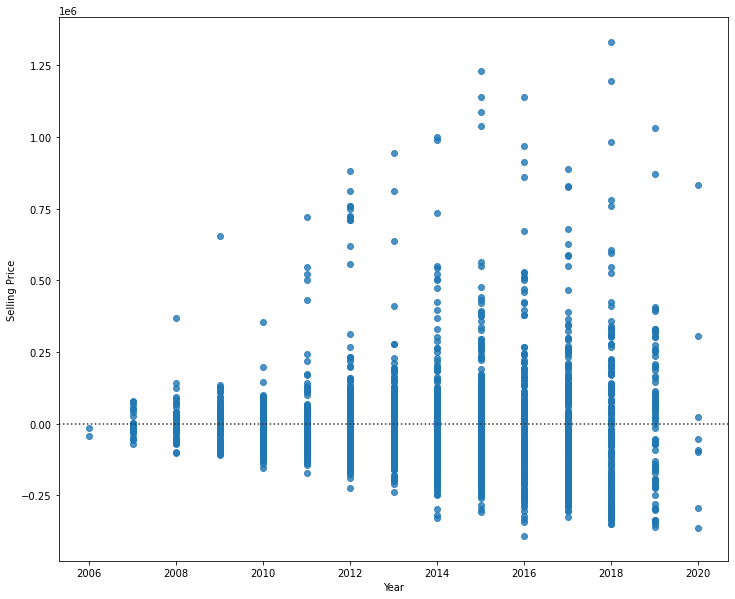

In [55]:
#create residual plot

plt.figure(figsize=(12, 10))
sns.residplot(x="Year", y="Selling Price", data=df, order=2)
plt.show()

Same as simple linear regression, variance is higher with later model.

In [47]:
#see the R-square of model on test data

poly.score(x_test_pr, y_test)

0.31329641615918347

# Cross Validation

In [53]:
#import required library

from sklearn.model_selection import cross_val_score

In [54]:
#do cross validation to know optimal R-square of the model

Rcross = cross_val_score(poly, x_data[['Year']], y_data, cv=4)

print("Mean of the cross validation:", Rcross.mean())
print("Standard deviation:" , Rcross.std())

Mean of the cross validation: 0.3224672748095695
Standard deviation: 0.02533759959846611


Judging from the  mean of cross validation, linear regression and polynomial regression don't do well on this data. Perhaps categorical variable regression is better.

Created by Muhammad Ilham